<a href="https://colab.research.google.com/github/CamelGoong/DataScienceLab/blob/main/%5B%EB%B0%95%ED%95%B4%EA%B7%A0%5D210817_GD%2COptimizer_%EC%84%B8%EC%85%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 필요한 라이브러리 Import

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # 처리할 device 설정

# 시드 고정
random.seed(111)
torch.manual_seed(111)
if device == 'cuda':
  torch.cuda.manual_seed_all(111)

#1. MNIST data load

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root = 'MNISt_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNISt_data/MNIST/raw/train-images-idx3-ubyte.gz to MNISt_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNISt_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNISt_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNISt_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNISt_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNISt_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNISt_data/MNIST/raw



In [ ]:
mnist_train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

이 그림의 라벨은 다음과 같습니다 :  5


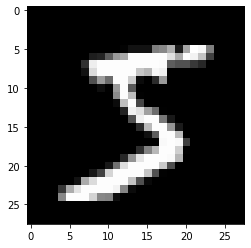

In [ ]:
plt.imshow(mnist_train[0][0].reshape(28,28), cmap = 'gray')
print('이 그림의 라벨은 다음과 같습니다 : ', mnist_train[0][1])

#2. 데이터로더 생성

In [ ]:
# hyperparameters 설정
learning_rate = 0.001
training_epochs = 50
batch_size = 100

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last  = True)

#3. 모델 생성

In [ ]:
# nn layers / 6층 layer model
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 128, bias = True)
linear4 = torch.nn.Linear(128, 64, bias = True)
linear5 = torch.nn.Linear(64, 32, bias = True)
linear6 = torch.nn.Linear(32, 10, bias = True)
sigmoid = torch.nn.Sigmoid()

# model 생성
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid, linear5, sigmoid, linear6).to(device)

In [ ]:
# define cost / loss & optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate) # optimizer로 Adagrad 사용!

total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    # reshpae input image into [batch_size by 784]
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad() # 기울기 초기화
    hypothesis = model(X)
    cost = criterion(hypothesis, Y) # 오차함수 계산
    cost.backward() # 계산한 cost가지고 오차역전파
    optimizer.step() # step 이동

    avg_cost += cost / total_batch # 배치들마다 계산된 cost를 평균내어, 한 epoch당 cost 계산.
  
  print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.8f}'.format(avg_cost))


Epoch:  0001 cost =  1.54499722
Epoch:  0002 cost =  1.49114263
Epoch:  0003 cost =  1.46034503
Epoch:  0004 cost =  1.43711054
Epoch:  0005 cost =  1.41834807
Epoch:  0006 cost =  1.40240967
Epoch:  0007 cost =  1.38818848
Epoch:  0008 cost =  1.37545443
Epoch:  0009 cost =  1.36342025
Epoch:  0010 cost =  1.35210598
Epoch:  0011 cost =  1.34163868
Epoch:  0012 cost =  1.33174849
Epoch:  0013 cost =  1.32265437
Epoch:  0014 cost =  1.31389713
Epoch:  0015 cost =  1.30553234
Epoch:  0016 cost =  1.29741716
Epoch:  0017 cost =  1.28956163
Epoch:  0018 cost =  1.28198242
Epoch:  0019 cost =  1.27455258
Epoch:  0020 cost =  1.26726103
Epoch:  0021 cost =  1.26003158
Epoch:  0022 cost =  1.25278747
Epoch:  0023 cost =  1.24536240
Epoch:  0024 cost =  1.23753440
Epoch:  0025 cost =  1.22915065
Epoch:  0026 cost =  1.22019720
Epoch:  0027 cost =  1.21095419
Epoch:  0028 cost =  1.20170760
Epoch:  0029 cost =  1.19264114
Epoch:  0030 cost =  1.18391073
Epoch:  0031 cost =  1.17542803
Epoch:  

# 과제 수행결과
1. FC layer 6층으로 layer를 구성하였음.
2. 활성화함수로 Relu가 아닌 Sigmoid를 사용하였을 때에도 전반적으로 train loss가 잘 감소하고 있음을 확인할 수 있었음.
3. 옵티마이저로 Adam아 아닌, Adagrad를 사용하였음.
